In [4]:
# pip install seaborn


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.0.7-cp311-cp311-win_amd64.whl (162 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1.0 MB)
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
df=pd.read_csv("final_scout_not_dummy.csv")

In [3]:
df.head(5)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [4]:
df.shape

(15915, 23)

In [5]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [6]:
df.duplicated().sum()

1673

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.make_model.value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

In [10]:
drop_model = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
drop_model

Index(['Renault Duster', 'Audi A2'], dtype='object', name='make_model')

In [11]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)
    
df.reset_index(drop=True, inplace=True)

In [12]:
df.sample(5)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
10952,Opel Insignia,Station wagon,22400,VAT deductible,53923.000,Used,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack","ABS,Adaptive headlights,Central door lock,Dayt...",1.000,1.000,125.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1487.000,front,5.600
5823,Opel Astra,Sedans,16990,VAT deductible,25350.000,Used,Benzine,5.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer,Radio",Alloy wheels,"Fog lights,Immobilizer,LED Headlights,Power st...",1.000,1.000,77.000,0,Metallic,Part/Full Leather,Semi-automatic,999.000,1273.000,front,4.900
13118,Renault Clio,Compact,10389,VAT deductible,1000.000,Used,Benzine,5.000,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Digital radio,Hands-free equipment,M...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",0.000,1.000,56.000,0,Metallic,Cloth,Manual,898.000,1100.000,front,5.000
7303,Opel Astra,Sedans,18890,VAT deductible,20.000,New,Benzine,6.000,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Central door lock,Daytime running lights,D...",0.000,1.000,110.000,0,Metallic,Cloth,Manual,1399.000,1273.000,front,5.400
288,Audi A1,Sedans,14450,VAT deductible,49466.000,Used,Diesel,7.000,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,Hands-free equipment,MP3,On-board co...",Voice Control,"ABS,Central door lock,Daytime running lights,D...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [13]:
df.make_model.value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14221 entries, 0 to 14220
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14221 non-null  object 
 1   body_type            14221 non-null  object 
 2   price                14221 non-null  int64  
 3   vat                  14221 non-null  object 
 4   km                   14221 non-null  float64
 5   Type                 14221 non-null  object 
 6   Fuel                 14221 non-null  object 
 7   Gears                14221 non-null  float64
 8   Comfort_Convenience  14221 non-null  object 
 9   Entertainment_Media  14221 non-null  object 
 10  Extras               14221 non-null  object 
 11  Safety_Security      14221 non-null  object 
 12  age                  14221 non-null  float64
 13  Previous_Owners      14221 non-null  float64
 14  hp_kW                14221 non-null  float64
 15  Inspection_new       14221 non-null 

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,14221.000,18107.423,7423.513,4950.000,12950.000,16950.000,21900.000,74600.000
km,14221.000,32627.045,36864.910,0.000,3921.000,21085.000,47000.000,317000.000
Gears,14221.000,5.939,0.703,5.000,5.000,6.000,6.000,8.000
age,14221.000,1.417,1.109,0.000,0.000,1.000,2.000,3.000
Previous_Owners,14221.000,1.042,0.335,0.000,1.000,1.000,1.000,4.000
hp_kW,14221.000,88.730,26.564,40.000,66.000,85.000,103.000,294.000
Inspection_new,14221.000,0.257,0.437,0.000,0.000,0.000,1.000,1.000
Displacement_cc,14221.000,1432.533,277.491,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,14221.000,1342.666,201.275,840.000,1165.000,1322.000,1487.000,2471.000
cons_comb,14221.000,4.825,0.863,3.000,4.100,4.800,5.400,9.100


In [16]:
df.describe(include="object").T

,count,unique,top,freq
make_model,14221,7,Audi A3,2758
body_type,14221,8,Sedans,7230
vat,14221,2,VAT deductible,13405
Type,14221,5,Used,10163
Fuel,14221,4,Benzine,7538
Comfort_Convenience,14221,6195,"Air conditioning,Electrical side mirrors,Hill ...",312
Entertainment_Media,14221,346,"Bluetooth,Hands-free equipment,On-board comput...",1562
Extras,14221,659,Alloy wheels,5009
Safety_Security,14221,4441,"ABS,Central door lock,Daytime running lights,D...",635
Paint_Type,14221,3,Metallic,13678


In [17]:
numerical= df.select_dtypes('number').columns
categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['price', 'km', 'Gears', 'age', 'Previous_Owners', 'hp_kW',
       'Inspection_new', 'Displacement_cc', 'Weight_kg', 'cons_comb'],
      dtype='object')


Categorical Columns: Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')


In [18]:
print("Number of Uniques:\n", df.nunique(),'\n', sep='')

Number of Uniques:
make_model                7
body_type                 8
price                  2948
vat                       2
km                     6689
Type                      5
Fuel                      4
Gears                     4
Comfort_Convenience    6195
Entertainment_Media     346
Extras                  659
Safety_Security        4441
age                       4
Previous_Owners           5
hp_kW                    77
Inspection_new            2
Paint_Type                3
Upholstery_type           2
Gearing_Type              3
Displacement_cc          68
Weight_kg               432
Drive_chain               3
cons_comb                62
dtype: int64



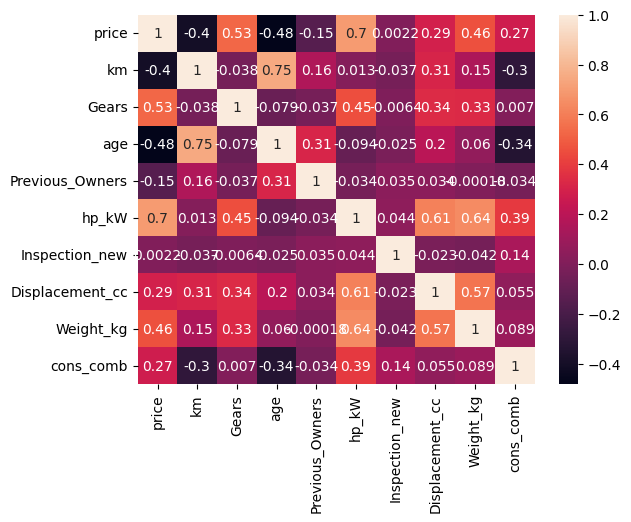

In [19]:
sns.heatmap(df.corr(method='pearson', min_periods=1, numeric_only=True), annot=True);

In [20]:
final_df=["make_model", "km", "Gearing_Type","hp_kW", "age", "Displacement_cc"]

## Modelling

In [21]:
X=df[final_df]
y=df['price']

In [22]:
X.sample(5)

,make_model,km,Gearing_Type,hp_kW,age,Displacement_cc
11849,Opel Insignia,1647.363,Manual,100.000,0.000,1598.000
2525,Audi A3,123750.000,Automatic,110.000,3.000,1968.000
11454,Opel Insignia,15000.000,Automatic,100.000,0.000,1598.000
6687,Opel Astra,20296.000,Manual,92.000,1.000,1400.000
842,Audi A1,12900.000,Manual,70.000,2.000,999.000


In [23]:
X.shape

(14221, 6)

In [24]:
y.shape

(14221,)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [27]:
cat_ordinal = X_train.select_dtypes("object").columns
cat_ordinal

Index(['make_model', 'Gearing_Type'], dtype='object')

In [28]:
ord_enc = OrdinalEncoder()
column_trans = make_column_transformer((ord_enc, cat_ordinal), remainder='passthrough')

In [29]:
X_train.sample(5)

,make_model,km,Gearing_Type,hp_kW,age,Displacement_cc
5276,Opel Astra,67623.000,Automatic,100.000,2.000,1598.000
374,Audi A1,19582.000,Automatic,70.000,3.000,999.000
11107,Opel Insignia,24980.000,Manual,125.000,1.000,1956.000
5250,Opel Astra,26000.000,Automatic,100.000,2.000,1598.000
10337,Opel Insignia,37125.000,Automatic,125.000,2.000,1956.000


In [30]:
X_train=column_trans.fit_transform(X_train)
X_test=column_trans.transform(X_test)

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
y_pred = rf_model.predict(X_test)

In [34]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print(" r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [35]:
eval_metrics(y_test,y_pred)

 r2_score: 0.9211608724649307 
 mae: 1217.7264421937016 
 mse: 4311415.455750806 
 rmse: 2076.3948217405105


In [36]:
import pickle

In [37]:
pickle.dump(rf_model, open("final_RF_model", 'wb'))

In [38]:
pickle.dump(column_trans, open('transformer', 'wb'))

## Final Model Deployment

In [39]:
final_model = pickle.load(open('final_RF_model', 'rb'))

In [40]:
final_model_transformer = pickle.load(open('transformer', 'rb'))

In [41]:
columns=list(X.columns)
columns

['make_model', 'km', 'Gearing_Type', 'hp_kW', 'age', 'Displacement_cc']

In [44]:
my_dict = {
    "age": 3,
    "hp_kW": 150,
    "km": 10000,
    "Gearing_Type":"Automatic",
    "make_model": 'Opel Insignia',
    'Displacement_cc' :1250 
}

In [45]:
df0 = pd.DataFrame([my_dict])

In [46]:
df0.head()

,age,hp_kW,km,Gearing_Type,make_model,Displacement_cc
0,3,150,10000,Automatic,Opel Insignia,1250


In [47]:
df1 = final_model_transformer.transform(df0)

In [48]:
prediction = final_model.predict(df1)
print(prediction)

[17376.584]


In [49]:
print("The estimated price of your car is €{}. ".format(int(prediction[0])))

The estimated price of your car is €17376. 
